In [1]:
from surprise import Dataset, Reader
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from surprise import accuracy, Dataset, SVD, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import GridSearchCV
from surprise import Prediction
from collections import defaultdict

In [2]:
#Leggi Dati e dividi in trainset e testset
# DATABASE 1M contenente i rating
data = Dataset.load_builtin("ml-1m")

raw_ratings = data.raw_ratings

# shuffle ratings
random.shuffle(raw_ratings)

# A = 80% of the data, B = 20% of the data
threshold = int(0.8 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]

data.raw_ratings = A_raw_ratings  # data is now the set A

# costruisci il set di allenamento su A
trainset = data.build_full_trainset()

# costruisce il set di test su B
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B

In [4]:
#TUNING SVD
# Select your best algo with grid search.
print("Grid Search...")
# hyperparameters search space

param_grid  = {
    "n_factors": range(20,101),
    "n_epochs": range(10,31),
    "reg_all": np.arange(0.01,0.1,0.01)
}
grid_search = GridSearchCV(SVD, param_grid, measures=["rmse","mse", "mae"], cv=3)
grid_search.fit(data)

algo = grid_search.best_estimator["rmse"]

Grid Search...


In [10]:
#risultati della GridSearch
risultatigs= pd.DataFrame.from_dict(grid_search.cv_results)
print(risultatigs)
print("best params: ")
print(grid_search.best_params)

    split0_test_rmse  split1_test_rmse  split2_test_rmse  mean_test_rmse  \
0           0.911749          0.912757          0.912197        0.912234   
1           0.910838          0.911291          0.910744        0.910958   
2           0.909220          0.911679          0.909710        0.910203   
3           0.909602          0.909720          0.910180        0.909834   
4           0.910330          0.911116          0.911492        0.910979   
5           0.910654          0.911839          0.911341        0.911278   
6           0.911920          0.912146          0.912214        0.912093   
7           0.912217          0.913210          0.912825        0.912750   
8           0.912645          0.914017          0.913360        0.913341   
9           0.907433          0.907806          0.907948        0.907729   
10          0.899955          0.901079          0.899450        0.900162   
11          0.900349          0.898967          0.899366        0.899561   
12          

C:\Users\Elia\AppData\Local\Temp\ipykernel_21484\345556123.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


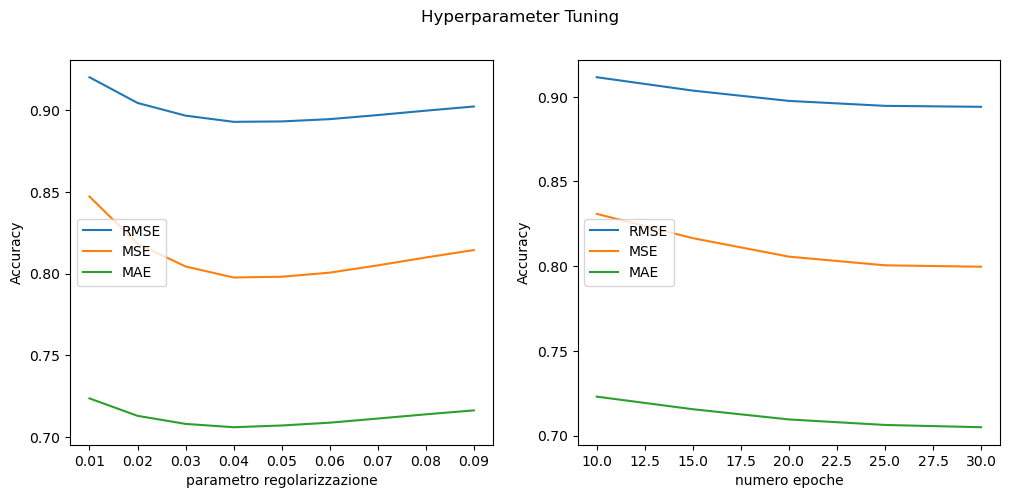

In [43]:
#Plot dell'accuracy al variare degli hyperparametri


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Hyperparameter Tuning')
ax1.plot(risultatigs.groupby(["param_reg_all"])["param_reg_all"].mean(),risultatigs.groupby(['param_reg_all'])["mean_test_rmse"].mean(), label = "RMSE")
ax1.plot(risultatigs.groupby(["param_reg_all"])["param_reg_all"].mean(),risultatigs.groupby(['param_reg_all'])["mean_test_mse"].mean(), label = "MSE")
ax1.plot(risultatigs.groupby(["param_reg_all"])["param_reg_all"].mean(),risultatigs.groupby(['param_reg_all'])["mean_test_mae"].mean(), label = "MAE")
ax1.set(xlabel='parametro regolarizzazione', ylabel='Accuracy')
#ax1.xlabel("parametro regolarizzazione")
#ax1.ylabel("Accuracy")
ax1.legend()
ax2.plot(risultatigs.groupby(["param_n_epochs"])["param_n_epochs"].mean(),risultatigs.groupby(['param_n_epochs'])["mean_test_rmse"].mean(), label = "RMSE")
ax2.plot(risultatigs.groupby(["param_n_epochs"])["param_n_epochs"].mean(),risultatigs.groupby(['param_n_epochs'])["mean_test_mse"].mean(), label = "MSE")
ax2.plot(risultatigs.groupby(["param_n_epochs"])["param_n_epochs"].mean(),risultatigs.groupby(['param_n_epochs'])["mean_test_mae"].mean(), label = "MAE")
ax2.set(xlabel='numero epoche', ylabel='Accuracy')
#ax2.xlabel("numero epoche")
#ax2.ylabel("Accuracy")
ax2.legend()
fig.show()
fig.savefig('img\gridSearchSVD.jpg')

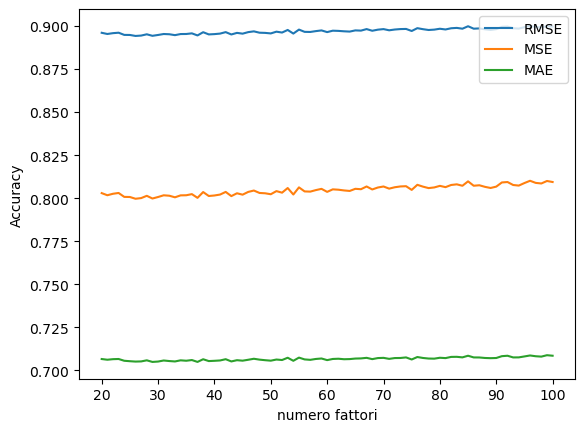

<Figure size 640x480 with 0 Axes>

In [6]:
#Plot dell'accuracy al variare degli hyperparametri 2




plt.plot(risultatigs.groupby(["param_n_factors"])["param_n_factors"].mean(),risultatigs.groupby(['param_n_factors'])["mean_test_rmse"].mean(), label = "RMSE")
plt.plot(risultatigs.groupby(["param_n_factors"])["param_n_factors"].mean(),risultatigs.groupby(['param_n_factors'])["mean_test_mse"].mean(), label = "MSE")
plt.plot(risultatigs.groupby(["param_n_factors"])["param_n_factors"].mean(),risultatigs.groupby(['param_n_factors'])["mean_test_mae"].mean(), label = "MAE")
plt.xlabel("numero fattori")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('img\gridSearchSVD2.jpg')

In [5]:
#risultati della GridSearch2
risultatigs= pd.DataFrame.from_dict(grid_search.cv_results)
print(risultatigs)
print("best params: ")
print(grid_search.best_params)

    split0_test_rmse  split1_test_rmse  split2_test_rmse  mean_test_rmse  \
0           0.896121          0.896618          0.895491        0.896077   
1           0.893788          0.895738          0.896630        0.895385   
2           0.895409          0.897447          0.894734        0.895863   
3           0.894198          0.898923          0.895243        0.896121   
4           0.895701          0.895558          0.893303        0.894854   
..               ...               ...               ...             ...   
76          0.899892          0.900622          0.899686        0.900067   
77          0.899073          0.900907          0.898176        0.899385   
78          0.897996          0.899298          0.900296        0.899197   
79          0.898617          0.901532          0.899841        0.899997   
80          0.898574          0.901003          0.899426        0.899668   

    std_test_rmse  rank_test_rmse  split0_test_mse  split1_test_mse  \
0        0.00046